# Seaborn Relational Plot 

In [2]:
import pandas as pd 
import seaborn as sns 

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.shape

(891, 15)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Creating new column with age decade bucket for each passenger

In [7]:
titanic['decade'] = [age//10*10 for age in titanic.age]
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,decade
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30.0


In [8]:
import matplotlib.pyplot as plt

In [9]:
sns.set_style("darkgrid")

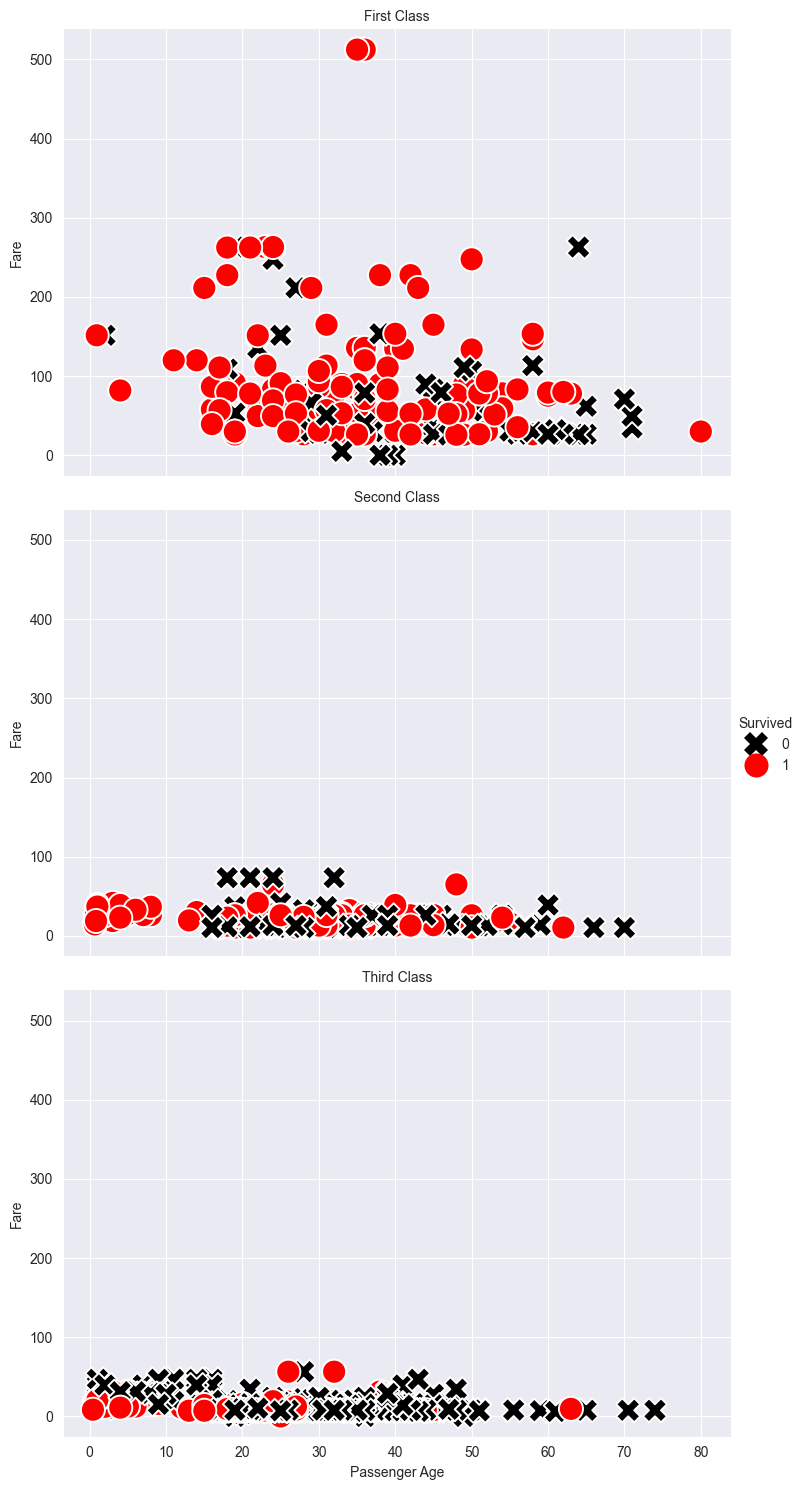

In [14]:
g = sns.relplot(x='age', y='fare', data=titanic,
            row='class',
            hue='survived',
            aspect=1.5,
                s=300,
                palette=['black', 'red'],
                style='survived',
                markers=['X', 'o']
           );
g.set_titles(row_template="{row_name} Class")
g.set_xlabels('Passenger Age')
g.set_ylabels('Fare')
leg = g._legend
leg.set_title('Survived');

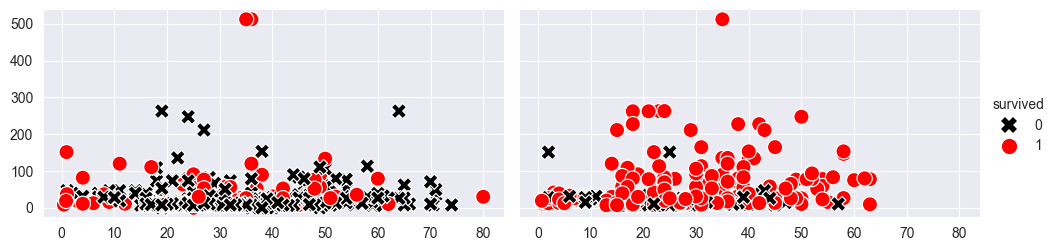

In [16]:
g = sns.relplot(x='age', y='fare', 
                data=titanic,
                col='sex',
                hue='survived',
                aspect=1.7,
                height=3,
                palette=['black', 'red'],
                style='survived',
                markers=['X', 'o'],
                s=120
               )
g.set_titles(col_template="")
g.set_xlabels("")
g.set_ylabels('');
#plt.savefig('18catplot_fig

# Basics 

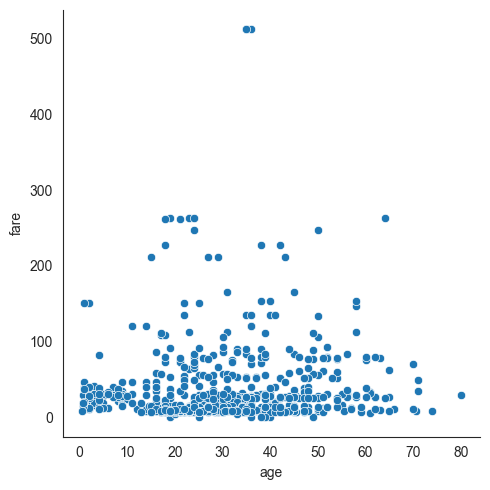

In [18]:
sns.set_style('white')
sns.relplot(titanic, x = 'age', y = 'fare')

### Categorical Variables: Hue, Style, Size

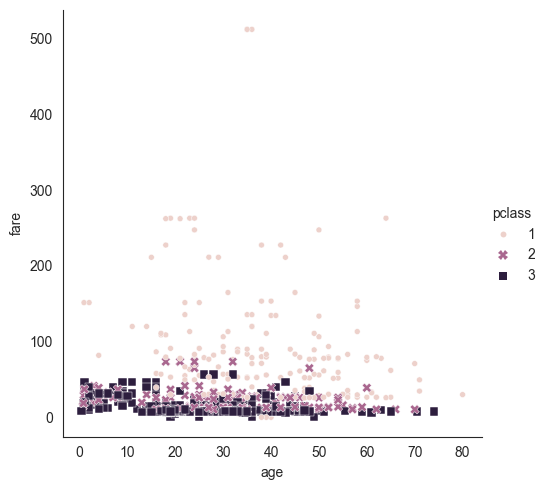

In [19]:
sns.relplot(titanic, x = 'age', y = 'fare',
            hue='pclass',
            style='pclass', 
            size='pclass')

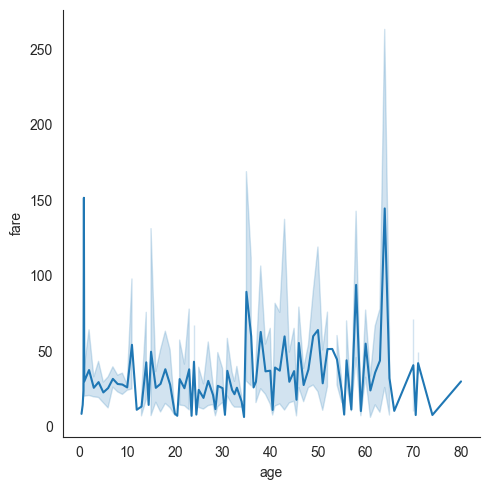

In [20]:
sns.relplot(titanic, x = 'age', y = 'fare', kind = 'line')

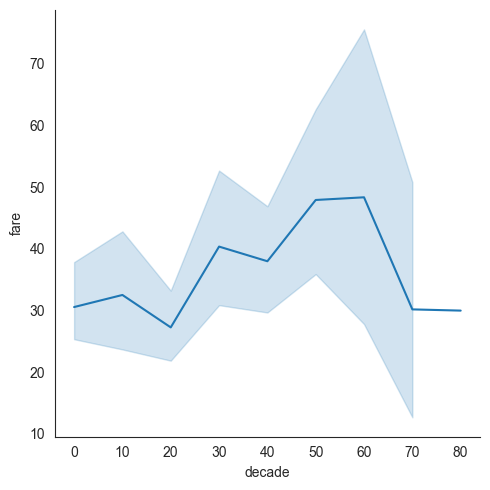

In [21]:
sns.relplot(titanic, x = 'decade', y = 'fare', kind='line')

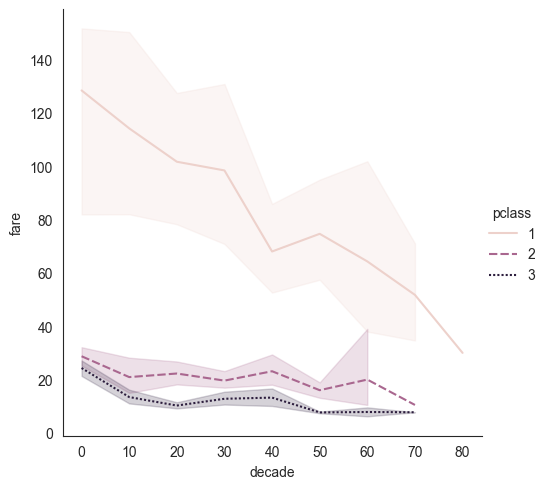

In [22]:
sns.relplot(titanic, x = 'decade', y = 'fare', 
            kind='line',
            hue='pclass',
            style='pclass')

## Small Multiples (FacetGrid)

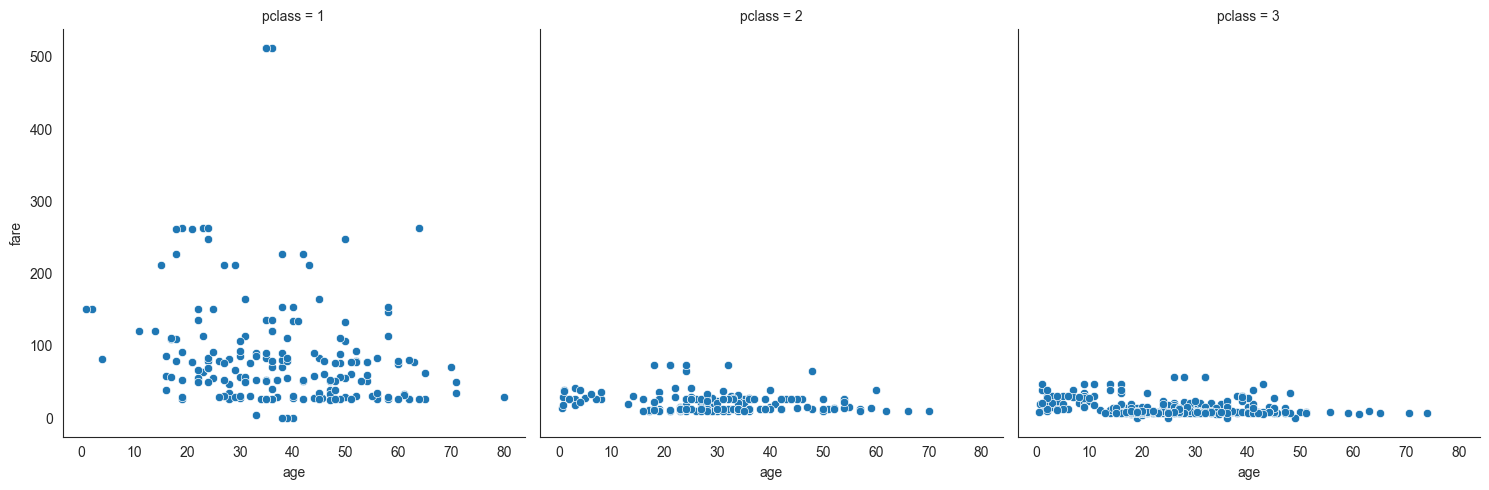

In [23]:
sns.relplot(titanic, x = 'age', y = 'fare', 
            col='pclass')

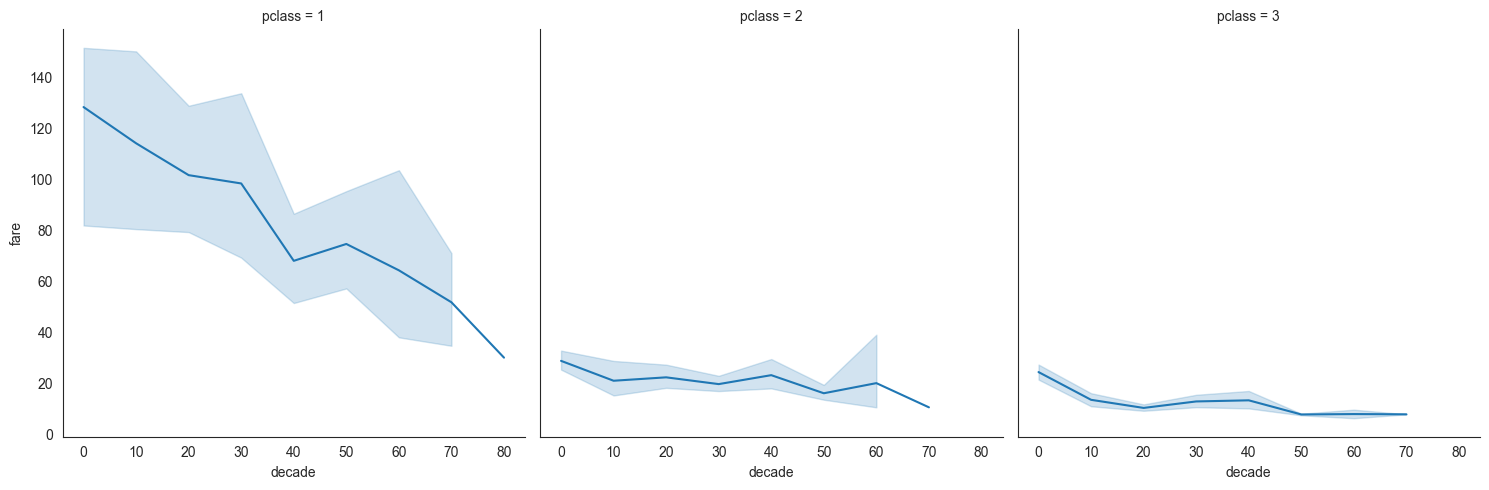

In [25]:
sns.relplot(titanic, x = 'decade', y = 'fare', 
            col='pclass',
            kind = 'line')

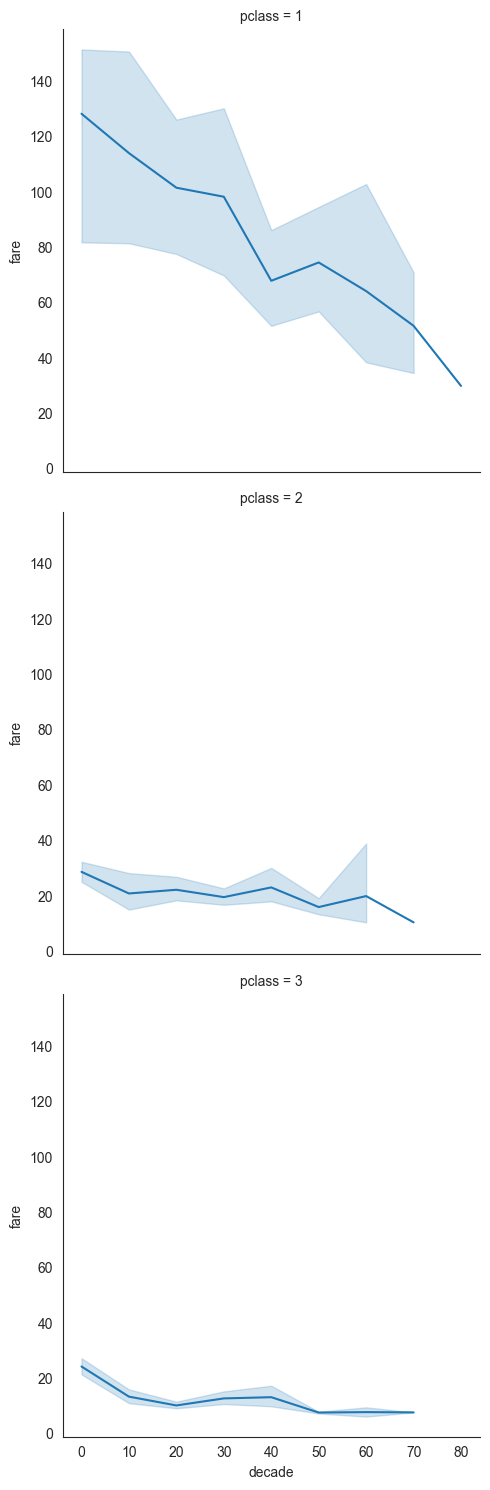

In [26]:
sns.relplot(titanic, x = 'decade', y = 'fare', 
            row='pclass',
            kind = 'line')

## Col_wrap

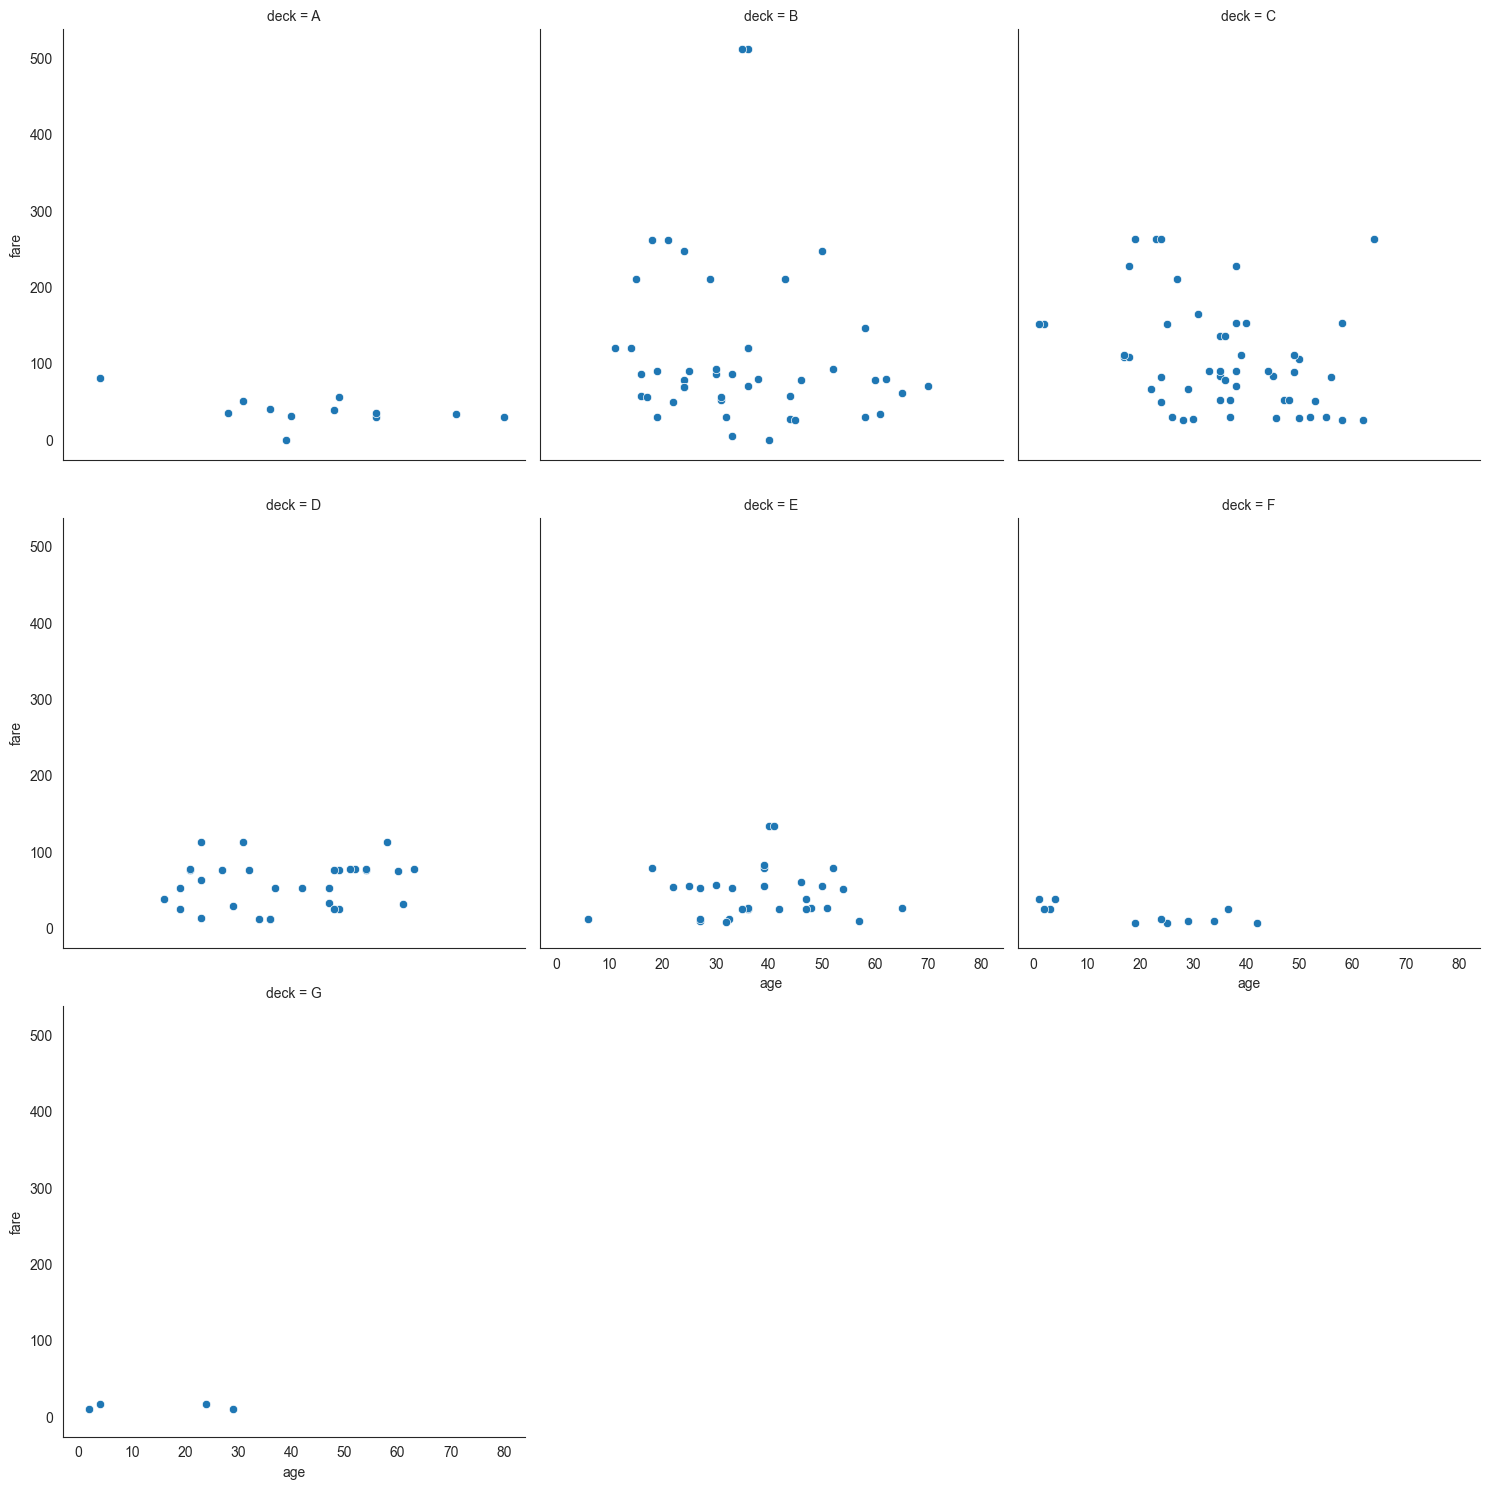

In [27]:
sns.relplot(titanic, x = 'age', y = 'fare', 
            col='deck',
            col_wrap= 3)

## Styling 

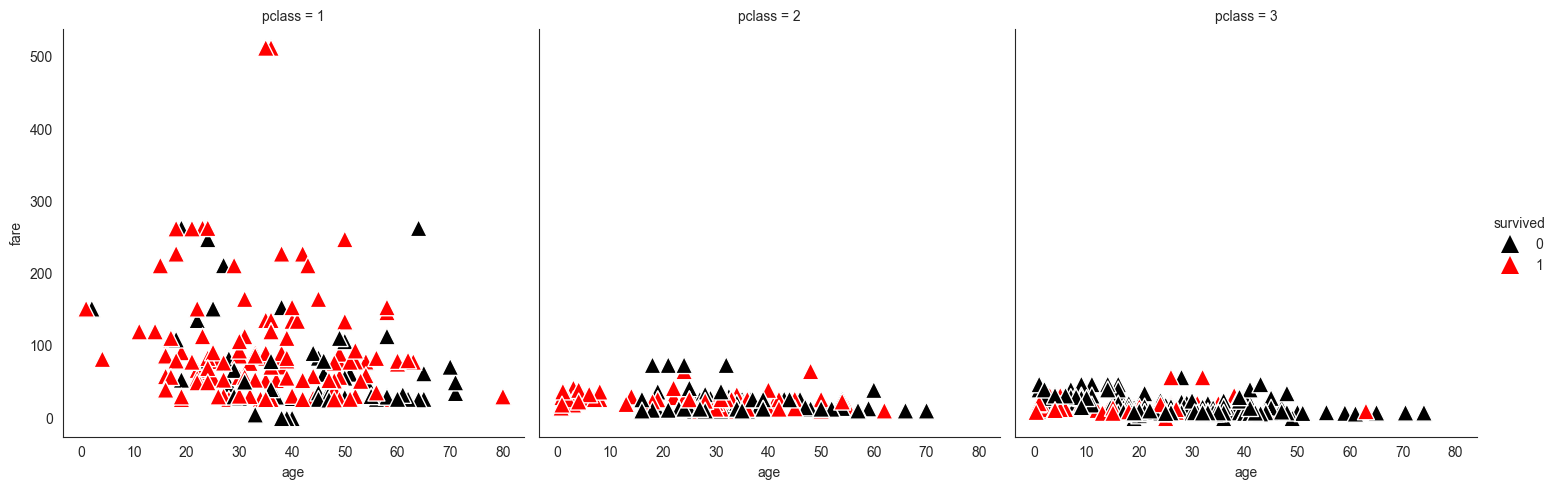

In [29]:
sns.relplot(x='age', y='fare', data=titanic,
            col='pclass',
            hue='survived',
            s=150,
            palette=['black', 'red'],
            marker='^'
           );

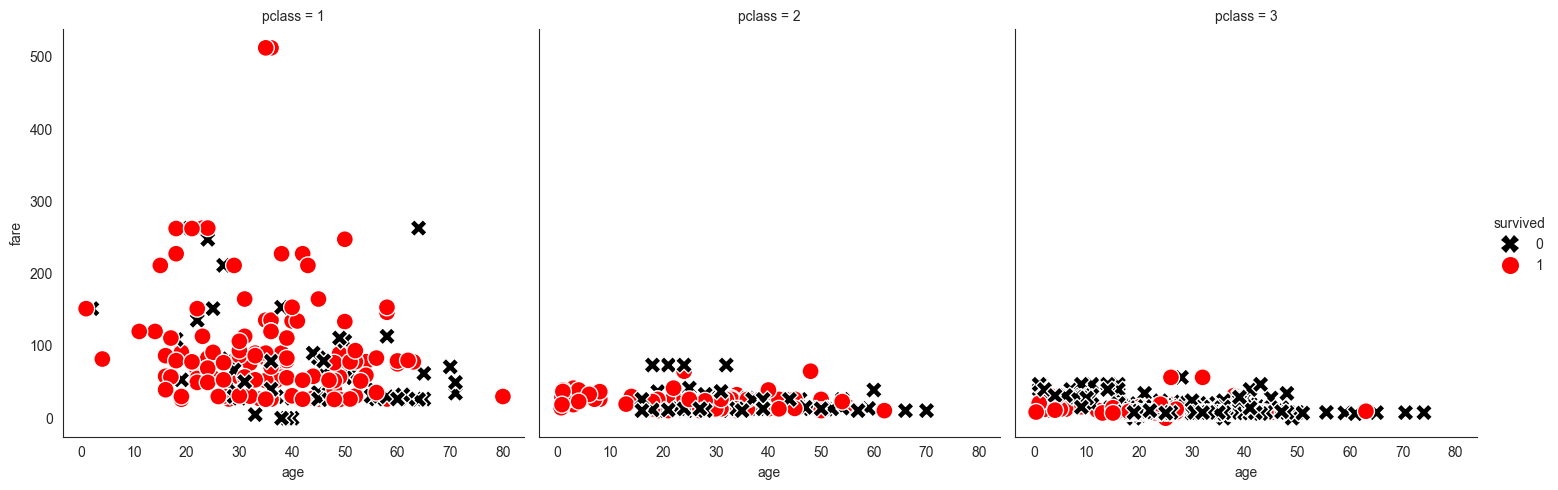

In [30]:
sns.relplot(x='age', y='fare', data=titanic,
            col='pclass',
            hue='survived',
            s = 150, 
            palette=['black', 'red'],
            style='survived',
            markers=['X', 'o']
           );

### FacetGrid Styling 

e:\Python\venv\myenv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


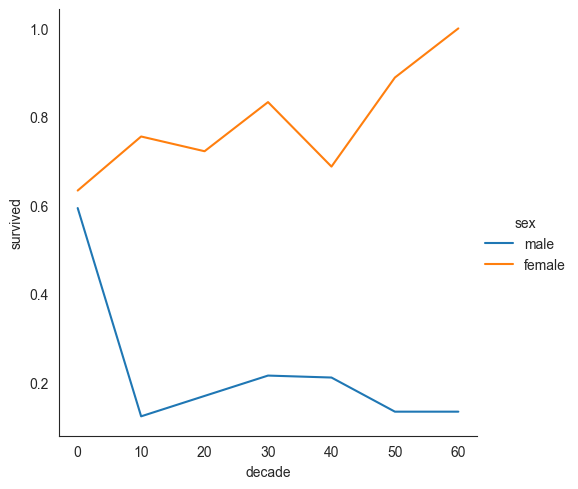

In [31]:
g = sns.relplot(x='decade', y='survived',
                data=titanic[titanic.age < 70],
                kind='line',
                hue='sex',
                ci=None
               );

In [32]:
type(g)

seaborn.axisgrid.FacetGrid

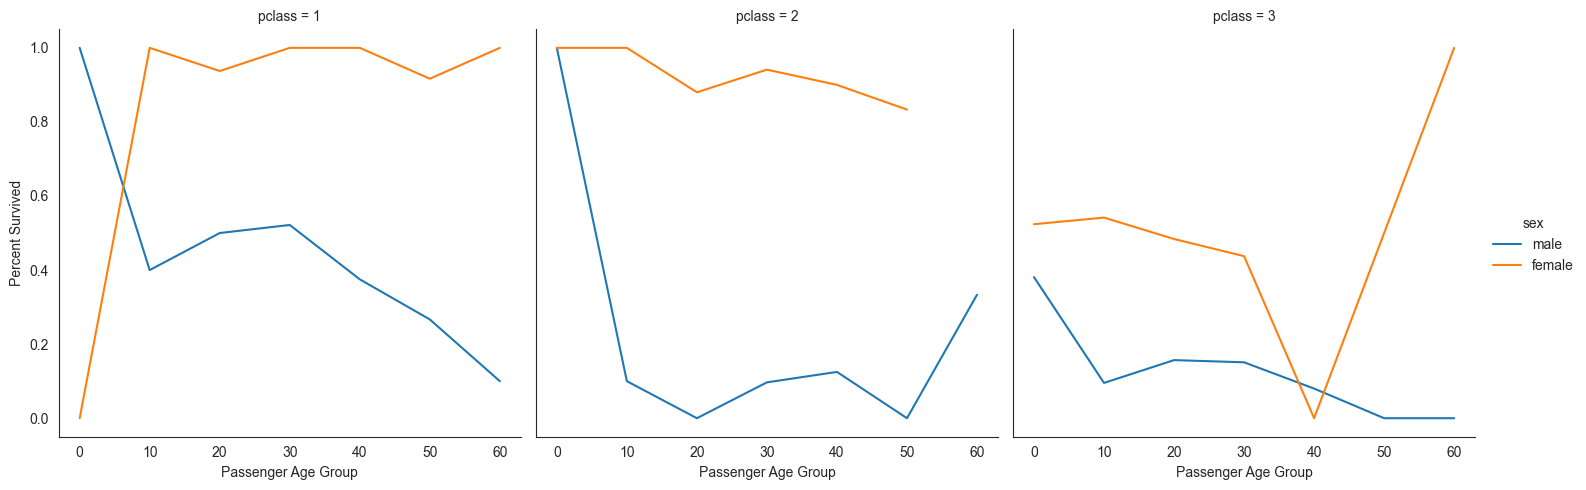

In [34]:
g = sns.relplot(x='decade', y='survived',
                data=titanic[titanic.age < 70],
                kind='line',
                hue='sex',
                errorbar=None,
                col='pclass'
               )

g.set_xlabels('Passenger Age Group')
g.set_ylabels("Percent Survived");